In [2]:
import pandas as pd 
import numpy as np


# Load the data
data = pd.read_csv('hand_crafted_v3.csv')

In [3]:
# Find Correlation

correlation = data.corr()
print(correlation)

                           item_id  prompt_id  mean_word  word_var  mean_sent  \
item_id                   1.000000   0.996694  -0.178233 -0.067524   0.014906   
prompt_id                 0.996694   1.000000  -0.180010 -0.069027   0.016157   
mean_word                -0.178233  -0.180010   1.000000  0.762553  -0.048731   
word_var                 -0.067524  -0.069027   0.762553  1.000000  -0.040515   
mean_sent                 0.014906   0.016157  -0.048731 -0.040515   1.000000   
sent_var                  0.048306   0.049935  -0.081008 -0.045088   0.418502   
ess_char_len             -0.191368  -0.182784   0.074549  0.170944  -0.052624   
word_count               -0.156856  -0.147741  -0.013147  0.101323  -0.045029   
prep_comma               -0.198897  -0.190457   0.081339  0.178907  -0.040272   
unique_word              -0.117159  -0.109240   0.110984  0.219512  -0.073668   
clause_per_s             -0.054654  -0.054636  -0.054513 -0.035900   0.634645   
mean_clause_l            -0.

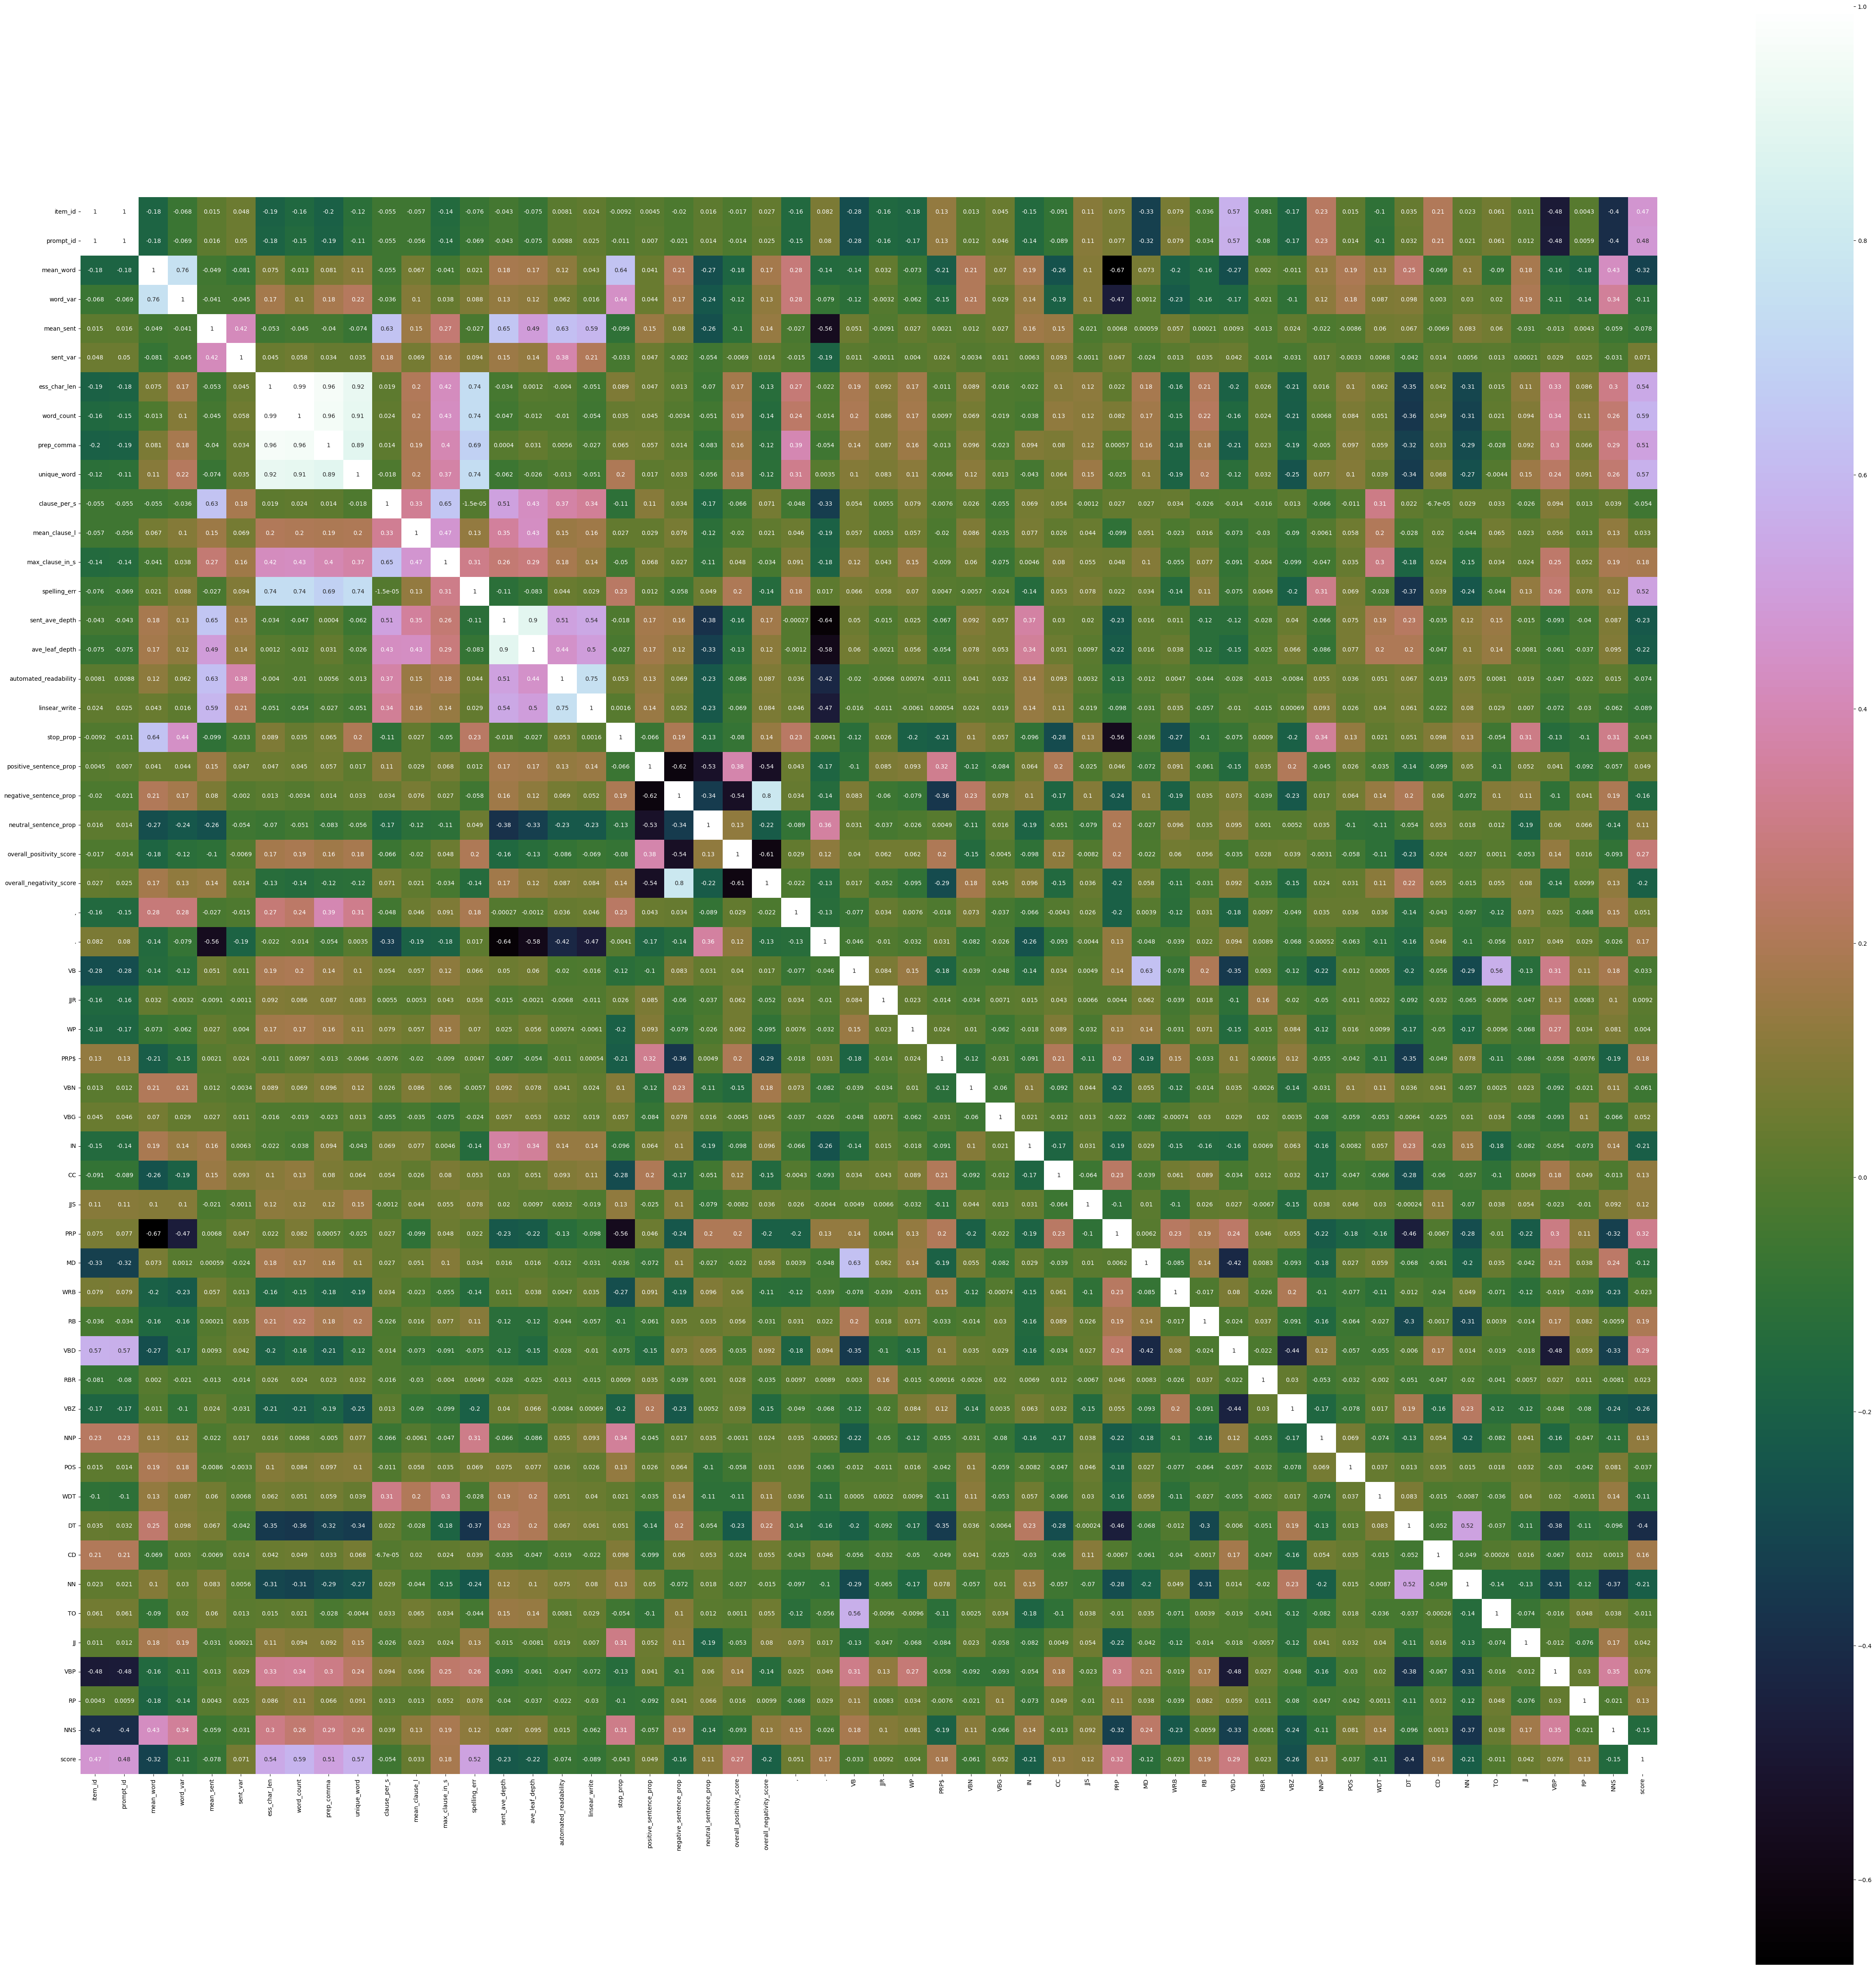

In [4]:
# draw heatmap

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(60,60))

sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')
plt.show()



In [5]:
correlation_matrix = data.corr().abs()  # Get absolute correlation values



In [6]:
# Set a threshold for correlation to decide when to drop features
threshold = 0.8

# Select upper triangle of correlation matrix
upper_triangle = correlation_matrix.where(
    np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool)
)


In [7]:
to_drop = [
    column for column in upper_triangle.columns if any(upper_triangle[column] > threshold)
]

to_drop.remove('prompt_id')

print(f"Columns to drop: {to_drop}")


Columns to drop: ['word_count', 'prep_comma', 'unique_word', 'ave_leaf_depth']


In [8]:
# remove prompt id
data_reduced = data.drop(to_drop, axis=1)  # Drop highly correlated features


In [9]:
data_reduced.head()

,item_id,prompt_id,mean_word,word_var,mean_sent,sent_var,ess_char_len,clause_per_s,mean_clause_l,max_clause_in_s,...,WDT,DT,CD,NN,TO,JJ,VBP,RP,NNS,score
0,1,1,4.400593,5.842492,21.062500,171.308594,1483,0.437500,8.000000,2,...,0.000000,0.051546,0.000000,0.144330,0.025773,0.048969,0.030928,0.007732,0.043814,8.0
1,2,1,4.353222,5.469506,20.950000,142.247500,1824,0.250000,7.800000,1,...,0.002146,0.075107,0.008584,0.122318,0.017167,0.042918,0.036481,0.004292,0.087983,9.0
2,3,1,4.405018,5.545638,19.928571,184.637755,1229,0.142857,16.500000,1,...,0.000000,0.085714,0.006349,0.123810,0.025397,0.047619,0.076190,0.009524,0.111111,7.0
3,4,1,4.868321,6.415867,19.407407,135.722908,2551,0.222222,9.333333,2,...,0.003247,0.069805,0.000000,0.126623,0.024351,0.066558,0.040584,0.001623,0.086039,10.0
4,5,1,4.408602,5.450249,15.500000,43.516667,2050,0.433333,5.230769,2,...,0.005780,0.104046,0.009634,0.131021,0.040462,0.042389,0.036609,0.001927,0.078998,8.0


In [10]:
data_reduced.shape

(12978, 50)

In [11]:
data_reduced.to_csv('hand_crafted_v3_reduced.csv', index=False)  # Save reduced data to a new CSV file

In [12]:
# Do same for readablity features
readability = pd.read_csv('readability_data.csv')

In [14]:
readability_correlation = readability.corr()
readability_correlation

,Essay_ID,Kincaid_Grade_Level,ARI,Coleman_Liau_Index,Flesch_Reading_Ease,Gunning_Fog_Index,LIX,SMOG_Index,RIX,Dale_Chall_Index,...,Total_Conjunctions,Total_Pronouns,Total_Prepositions,Total_Nominalizations,Total_Pronoun_Starters,Total_Interrogative_Starters,Total_Article_Starters,Total_Subordinate_Starters,Total_Conjunction_Starters,Total_Preposition_Starters
Essay_ID,1.000000,-0.319906,-0.327333,-0.084583,0.290376,-0.070298,-0.288819,-0.415136,-0.326738,0.214974,...,-0.145206,-0.068173,0.017777,0.003704,0.121209,-0.033105,0.038806,-0.047884,-0.002165,-0.011671
Kincaid_Grade_Level,-0.319906,1.000000,0.822463,0.529797,-0.880090,0.777393,0.866556,0.594671,0.752657,0.136779,...,0.133944,-0.050923,-0.002176,0.035940,-0.328628,-0.065957,0.072175,0.007029,-0.153522,-0.048069
ARI,-0.327333,0.822463,1.000000,0.477889,-0.561872,0.882301,0.900721,0.673534,0.845707,0.114368,...,0.234201,0.042268,0.117117,0.131584,-0.304591,-0.051159,-0.037792,0.019336,-0.105951,0.012856
Coleman_Liau_Index,-0.084583,0.529797,0.477889,1.000000,-0.650913,0.412118,0.575743,0.330123,0.475418,0.539086,...,-0.040432,-0.195758,-0.128170,0.146649,-0.250095,-0.111050,0.119246,-0.109338,-0.157966,-0.070450
Flesch_Reading_Ease,0.290376,-0.880090,-0.561872,-0.650913,1.000000,-0.525824,-0.721062,-0.462508,-0.593568,-0.345541,...,-0.011666,0.176749,0.148001,-0.038375,0.328830,0.118784,-0.171798,0.064925,0.194056,0.069181
Gunning_Fog_Index,-0.070298,0.777393,0.882301,0.412118,-0.525824,1.000000,0.862430,0.723464,0.806106,0.119994,...,0.199936,0.041722,0.128759,0.143227,-0.236434,-0.066599,0.014644,0.018172,-0.104993,0.016196
LIX,-0.288819,0.866556,0.900721,0.575743,-0.721062,0.862430,1.000000,0.700374,0.940553,0.223198,...,0.167010,-0.020161,0.064659,0.174015,-0.294922,-0.083468,0.070703,0.003317,-0.166488,0.020236
SMOG_Index,-0.415136,0.594671,0.673534,0.330123,-0.462508,0.723464,0.700374,1.000000,0.788541,-0.102890,...,0.266026,0.118621,0.264005,0.250543,-0.107404,0.032520,0.052505,0.121157,-0.053719,0.116068
RIX,-0.326738,0.752657,0.845707,0.475418,-0.593568,0.806106,0.940553,0.788541,1.000000,0.069049,...,0.208365,0.029741,0.178059,0.239046,-0.226821,-0.042460,0.060927,0.055231,-0.128579,0.070509
Dale_Chall_Index,0.214974,0.136779,0.114368,0.539086,-0.345541,0.119994,0.223198,-0.102890,0.069049,1.000000,...,-0.106822,-0.204149,-0.289905,0.028533,-0.178349,-0.184944,0.101289,-0.222234,-0.147035,-0.054243


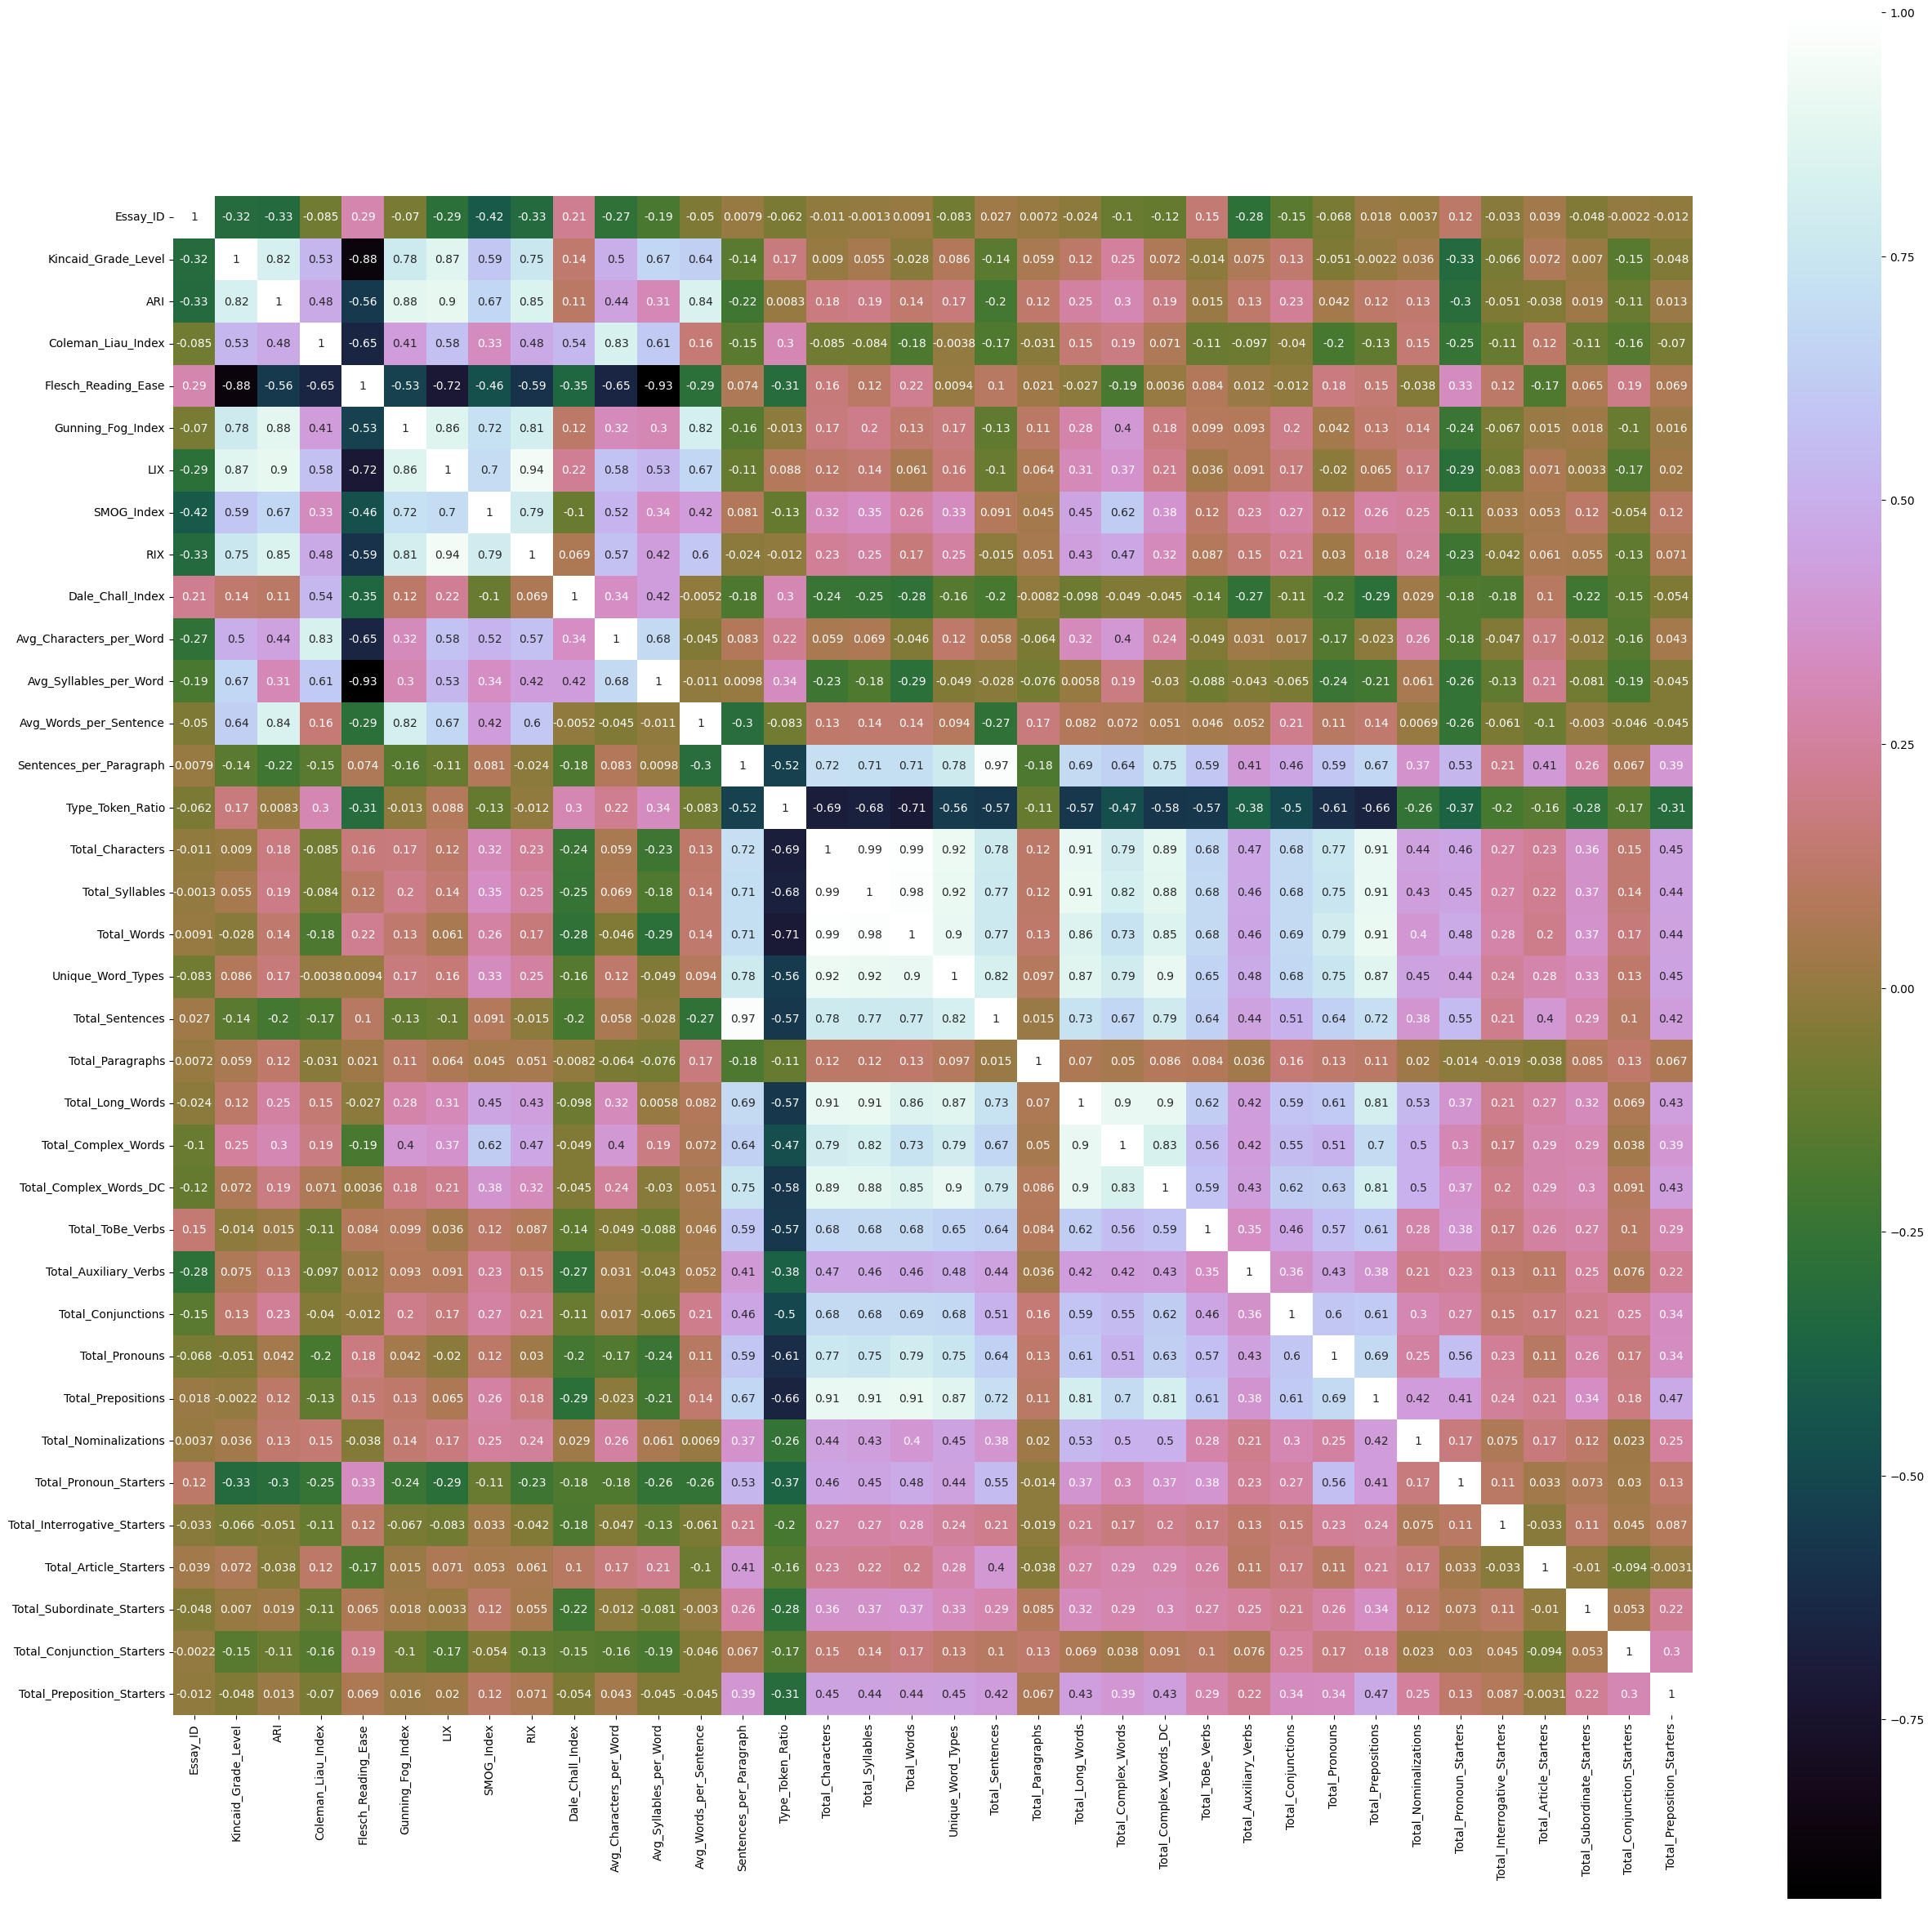

In [17]:
# draw heatmap

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(30,30))

sns.heatmap(readability_correlation, vmax=1, square=True,annot=True,cmap='cubehelix')
plt.show()



In [15]:
readability_correlation_matrix = readability.corr().abs()  # Get absolute correlation values

In [18]:
# Set a threshold for correlation to decide when to drop features
threshold = 0.8

# Select upper triangle of correlation matrix
upper_triangle = readability_correlation_matrix.where(
    np.triu(np.ones(readability_correlation_matrix.shape), k=1).astype(bool)
)


In [20]:
to_drop = [
    column for column in upper_triangle.columns if any(upper_triangle[column] > threshold)
]

print(f"Columns to drop: {to_drop}")


Columns to drop: ['ARI', 'Flesch_Reading_Ease', 'Gunning_Fog_Index', 'LIX', 'RIX', 'Avg_Characters_per_Word', 'Avg_Syllables_per_Word', 'Avg_Words_per_Sentence', 'Total_Syllables', 'Total_Words', 'Unique_Word_Types', 'Total_Sentences', 'Total_Long_Words', 'Total_Complex_Words', 'Total_Complex_Words_DC', 'Total_Prepositions']


In [21]:
# remove prompt id
readability_reduced = readability.drop(to_drop, axis=1)  # Drop highly correlated features


In [22]:
readability_reduced.head()

,Essay_ID,Kincaid_Grade_Level,Coleman_Liau_Index,SMOG_Index,Dale_Chall_Index,Sentences_per_Paragraph,Type_Token_Ratio,Total_Characters,Total_Paragraphs,Total_ToBe_Verbs,Total_Auxiliary_Verbs,Total_Conjunctions,Total_Pronouns,Total_Nominalizations,Total_Pronoun_Starters,Total_Interrogative_Starters,Total_Article_Starters,Total_Subordinate_Starters,Total_Conjunction_Starters,Total_Preposition_Starters
0,1.0,0.473611,0.417457,0.549841,0.245001,0.242857,0.320369,0.398838,0.0,0.204082,0.142857,0.318182,0.391304,0.073171,0.08,0.285714,0.000000,0.333333,0.0,0.000000
1,2.0,0.582582,0.441778,0.698836,0.368179,0.285714,0.297675,0.491835,0.0,0.163265,0.571429,0.409091,0.452174,0.219512,0.16,0.142857,0.181818,0.111111,0.0,0.000000
2,3.0,0.445281,0.424657,0.636807,0.380837,0.214286,0.389643,0.327706,0.0,0.224490,0.142857,0.363636,0.200000,0.024390,0.04,0.142857,0.090909,0.111111,0.1,0.083333
3,4.0,0.562133,0.703988,0.723364,0.552666,0.385714,0.280733,0.685026,0.0,0.448980,0.535714,0.386364,0.313043,0.390244,0.04,0.285714,0.363636,0.222222,0.0,0.250000
4,5.0,0.443214,0.421405,0.625058,0.201825,0.414286,0.249749,0.556324,0.0,0.510204,0.857143,0.340909,0.313043,0.268293,0.28,0.000000,0.636364,0.444444,0.0,0.333333


In [23]:
readability_reduced.shape

(12978, 20)

In [24]:
# save
readability_reduced.to_csv('readability_data_reduced.csv', index=False)  # Save reduced data to a new CSV file

In [26]:
# convert to numpy array
readability_reduced = readability_reduced.values

In [27]:
readability_reduced

array([[1.00000000e+00, 4.73611360e-01, 4.17457154e-01, ...,
        3.33333333e-01, 0.00000000e+00, 0.00000000e+00],
       [2.00000000e+00, 5.82581672e-01, 4.41777678e-01, ...,
        1.11111111e-01, 0.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 4.45281274e-01, 4.24657401e-01, ...,
        1.11111111e-01, 1.00000000e-01, 8.33333333e-02],
       ...,
       [2.16290000e+04, 5.14704772e-01, 4.94557696e-01, ...,
        1.81818182e-01, 2.35294118e-01, 2.35294118e-01],
       [2.16300000e+04, 4.08351936e-01, 3.70961785e-01, ...,
        2.72727273e-01, 1.17647059e-01, 2.94117647e-01],
       [2.16330000e+04, 5.28985760e-01, 4.24032980e-01, ...,
        4.54545455e-01, 0.00000000e+00, 5.88235294e-02]])

In [ ]:
# save in readability.pickle file
import pickle

with open('readability_reduced.pickle', 'wb') as f:
    pickle.dump(readability_reduced, f)